# Assignment on Introduction to linear regression 

## Due on Sunday March 31 at 11:59 pm

Instructions:

1. Each question contains equal points that is 10X10 = 100 points

2. Name your submission as follows: Assignment2\_YourFirstName\_CourseCode.FileExtension

3. Submit your assignment using the link provided in Blackboard.

## Batter up

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, betterpredict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

## The data

Load up the Moneyball data (mlb11.csv) for the 2011 season from Blackboard folder.

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols

In [2]:
mlb_df = pd.read_csv("mlb11.csv")

In [3]:
mlb_df.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


In addition to `runs` scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis (exercises 1 - 8) you'll consider the seven traditional variables. After that, you'll work with the newer variables on excercises 9 and 10.

### On data exploration

<div class = 'exercise'>
<h4>Exercise 1</h4>
(a) What type of plot would you use to display the relationship between <code>runs</code> and one of the other numerical variables? Plot this relationship using the variable <code>at_bats</code> as the predictor. Does the relationship look linear? If you knew a team's <code>at_bats</code>, would you be comfortable using a linear model to predict the number of runs?
    
(b) Looking at the plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.
</div>

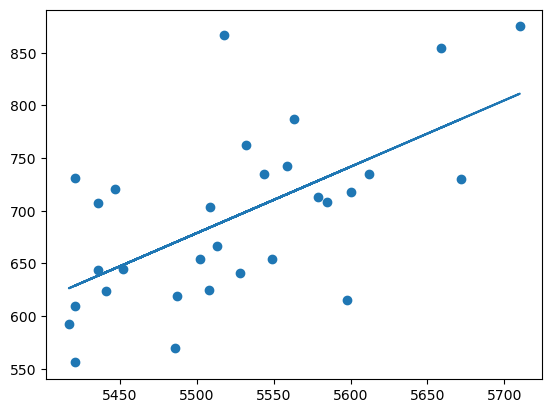

In [4]:
#scatter plot with regression line
y= mlb_df['runs']
x1 = mlb_df['at_bats']
plt.scatter(x1,y)
m, b = np.polyfit(x1, y, 1)
plt.plot(x1, m*x1+b)

A.I plotted a scatter plot. The relationship looks somewhat linear but there would be high residuals between the prediction from the line and  the real values. The prediction would not be strong enough to create a linear model that we would be comfortable with. 

B. The relationship between runs and at_bats is a positive moderately strong correlation. There are a few outliers also at 5100 and 5600. 

### On fitting a linear model

<div class = 'exercise'>
<h4>Exercise 2</h4>
Let's see if the apparent trend in the plot is something more than natural variation. Fit a linear model to predict average <code>runs</code> score by average <code>at_bats</code> and add the line to your plot. Write out the equation for the linear model and interpret the slope. Is average <code>at_bats</code> a statistically significant predictor? Does it appear to be a practically significant predictor?
</div>

In [5]:
formula = 'y ~ x1'
results = ols(formula, data=mlb_df).fit()


#In any case, results.summary() will display the regression results and organize them into three tables.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           0.000339
Time:                        04:03:42   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

Linear model equation
y= 0.6305 x -2789.2429

It is a statisically significant predictor because the P value is less than 0.05. It does not seem to practically significancy because based on the rsquared it is not very accuarate. 


### On prediction and prediction errors

<div class = 'exercise'>
<h4>Exercise 3</h4>
If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?
</div>

In [6]:
pred= 0.6305*5578 -2789.2429
print(pred)

#There is no data point to compare to see if the estimates is over or under so we cannot generate a residual. 

727.6860999999994


Based on the equation from the least squares regression line. There would be 728 runs for the 5,578 at bats.

In [7]:
mlb_df

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766
5,New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725
6,New York Yankees,867,5518,1452,222,0.263,1138,147,97,0.343,0.444,0.788
7,Milwaukee Brewers,721,5447,1422,185,0.261,1083,94,96,0.325,0.425,0.750
8,Colorado Rockies,735,5544,1429,163,0.258,1201,118,73,0.329,0.410,0.739
9,Houston Astros,615,5598,1442,95,0.258,1164,118,56,0.311,0.374,0.684


### On model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) Independence, (3) nearly normal residuals, and (4) constant variability.

Answer the following question based on diagnostic plots. 

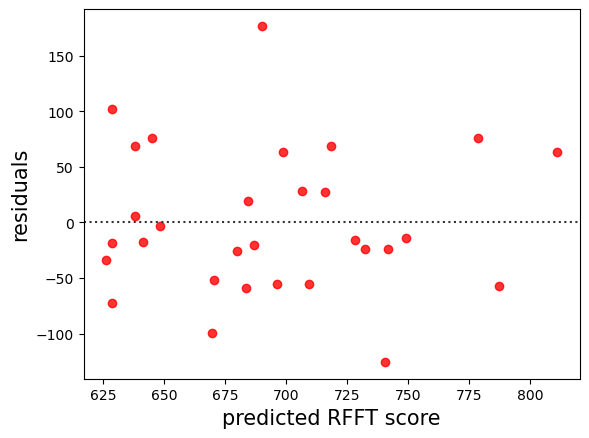

In [8]:
yhat =0.6305*x1 -2789.2429

residuals= (y -yhat)
sns.residplot(x= yhat, y= residuals, color = 'red')
plt.xlabel('predicted RFFT score', fontsize = 15)
plt.ylabel('residuals', fontsize = 15)
plt.show()

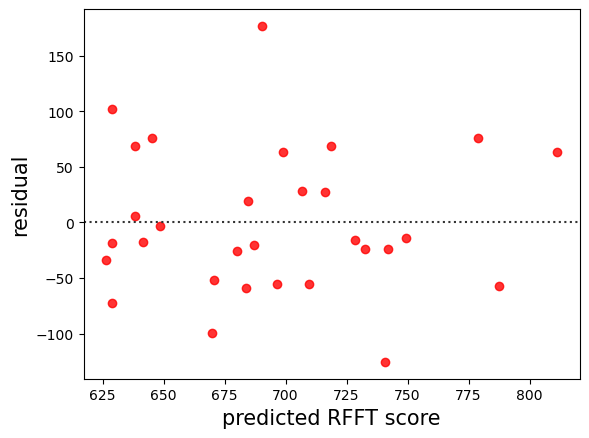

In [9]:
# Residuals from statsmodel

residuals_model = pd.DataFrame({'actual': mlb_df['runs'], 
                                  'predicted': results.fittedvalues, 
                                  'residual': results.resid})
residuals_model.head(10)


sns.residplot(x= residuals_model.iloc[:, 1], y= residuals_model.iloc[:, 2], color = 'red')
plt.xlabel('predicted RFFT score', fontsize = 15)
plt.ylabel('residual', fontsize = 15)
plt.show()

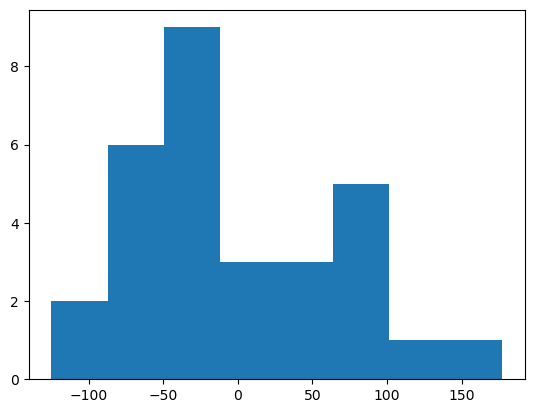

In [10]:
#histogram of residuals
plt.hist(residuals, bins = 8)
plt.show()


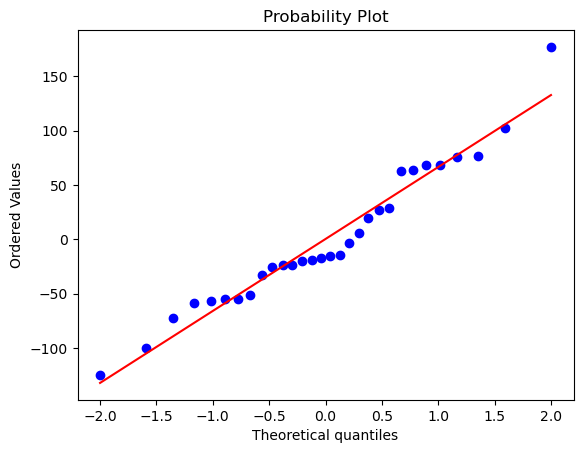

In [11]:
#Normal Q-Q Plot
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show()

<div class = 'exercise'>
<h4>Exercise 4</h4>
(a) Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats? Based on the residual plot, does the constant variability condition appear to be met?
    
(b) Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?</div>
</div>

 A. There is not really a pattern in ther residual plots. The relationship between runs and at bats can be considered linear but it isn't tightly linear. Constant variability condition appears to be met based on the residuals plot.
 
B.I would say no. It almost appears to be almost bimodal.

### On building new models

<div class = 'exercise'>
<h4>Exercise 5</h4>
    Fit a new model that uses <code>homeruns</code> to predict <code>runs</code>. Using the estimates from the Python output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?
</div>

In [12]:
y = mlb_df['runs']
x1 = mlb_df['homeruns']

formula = 'y ~ x1'
results = ols(formula, data=mlb_df).fit()


#In any case, results.summary() will display the regression results and organize them into three tables.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.90e-07
Time:                        04:03:42   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.2389     41.678      9.963      0.0

y= 1.8345(home_runs) +415.2389
The more homeruns the more runs the team has. This means that there is a positive relationship between homeruns and success. 

<div class = 'exercise'>
<h4>Exercise 6</h4>
Choose another traditional variable from <code>mlb11</code> that you think might be a good predictor of <code>runs</code>. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship? 
    
</div>

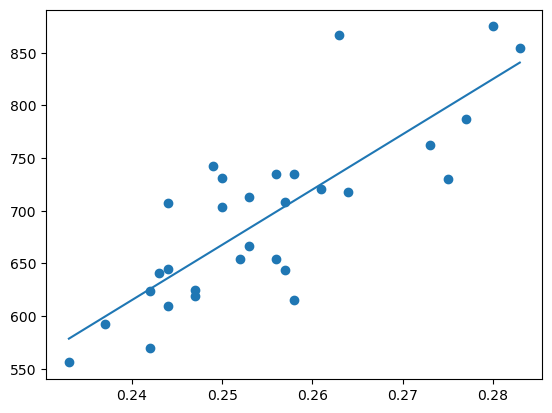

In [14]:
#scatter plot with regression line
y= mlb_df['runs']
x1 = mlb_df['bat_avg']
plt.scatter(x1,y)
m, b = np.polyfit(x1, y, 1)
plt.plot(x1, m*x1+b)

In [15]:
formula = 'y ~ x1'
results = ols(formula, data=mlb_df).fit()


#In any case, results.summary() will display the regression results and organize them into three tables.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     53.41
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.88e-08
Time:                        04:09:38   Log-Likelihood:                -158.43
No. Observations:                  30   AIC:                             320.9
Df Residuals:                      28   BIC:                             323.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -642.8189    183.080     -3.511      0.0

There seems to be a linear relationship between batting averages and runs. 

<div class = 'exercise'>
<h4>Exercise 7</h4>
How does this relationship compare to the relationship between <code>runs</code> and <code>at_bats</code>? Use the R squared values from the two model summaries to compare. Does your variable seem to predict <code>runs</code> better than <code>at_bats</code>? How can you tell? 
    
</div>


Batting average is much more accurate than the at_bats. The R squared of the batting average prediction is 0.656 and for at bats it was 0.373. Since batting average rsquared is closer to 1 we know it more accurate than at bats. 

<div class = 'exercise'>
<h4>Exercise 8</h4>    
Now that you can summarize the linear relationship between two variables, investigate the relationships between <code>runs</code> and each of the other five traditional variables. Which variable best predicts <code>runs</code>? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five).
    
</div>

In [16]:
mlb_df.head(1)

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.34,0.46,0.8


In [17]:
col_names = list(mlb_df.columns)[2:]
col_names.remove('bat_avg')
col_names.remove('homeruns')
col_names

['at_bats',
 'hits',
 'strikeouts',
 'stolen_bases',
 'wins',
 'new_onbase',
 'new_slug',
 'new_obs']

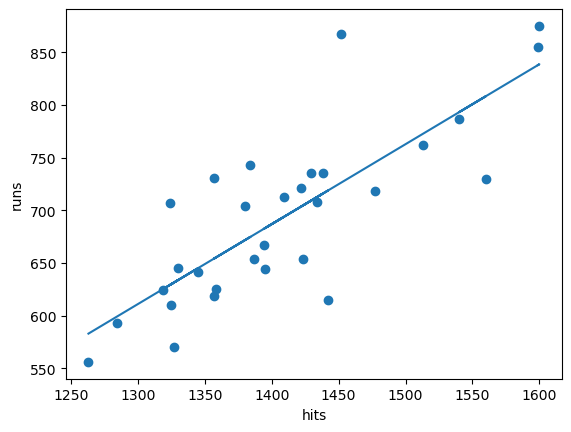

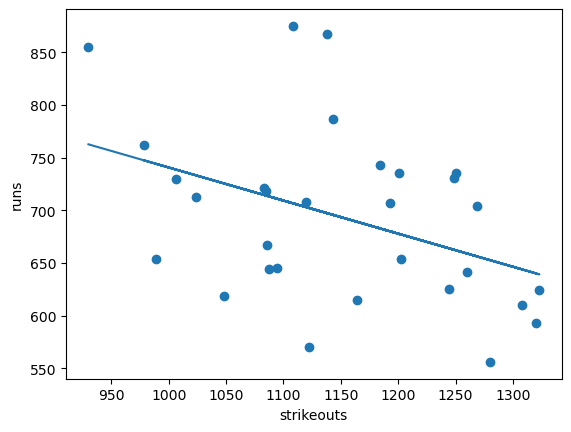

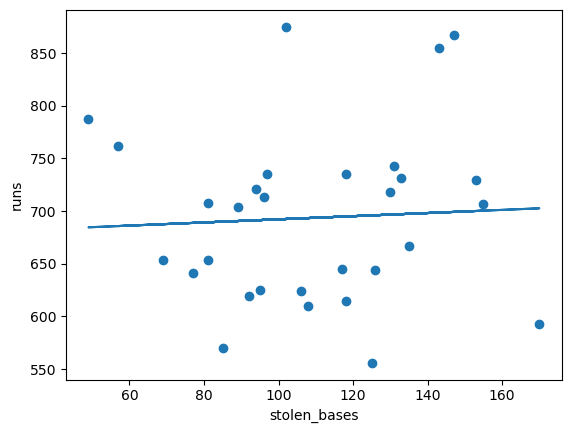

In [18]:
#scatter plot with regression line
for item in col_names[1:4]:
    y= mlb_df['runs']
    x1 = mlb_df[item]
    plt.scatter(x1,y)
    m, b = np.polyfit(x1, y, 1)
    plt.plot(x1, m*x1+b)
    plt.xlabel(item)
    plt.ylabel('runs')
    plt.show()

In [19]:
y = mlb_df['runs']

for item in col_names[1:4]:
    x1 = mlb_df[item]

    formula = 'y ~ x1'
    results = ols(formula, data=mlb_df).fit()

    #In any case, results.summary() will display the regression results and organize them into three tables.
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.20
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.04e-07
Time:                        04:10:52   Log-Likelihood:                -159.03
No. Observations:                  30   AIC:                             322.1
Df Residuals:                      28   BIC:                             324.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -375.5600    151.181     -2.484      0.0

Hits predicts runs the best because it has the highest rsquared value and its values are more closely coupled with prediction line. 

### On new variables

<div class = 'exercise'>
<h4>Exercise 9</h4>
   Now examine the three newer variables. These are the statistics used by the author of <i>Moneyball</i> to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we've analyzed, which seems to be the best predictor of <code>runs</code>? Using the limited (or not so limited) information you know about these baseball statistics, does your result make sense?
    
</div>

They are significantly more effective at predicting than the old variables.  This can be seen as they all have R-squared close to 1. Additionally, one can see that the scatter plots do not have significancy outliers and all values are fairly tightly coupled to the line. New_obs has the highest r squared and is the most tightly coupled to the prediction line. My result does makes sense. 

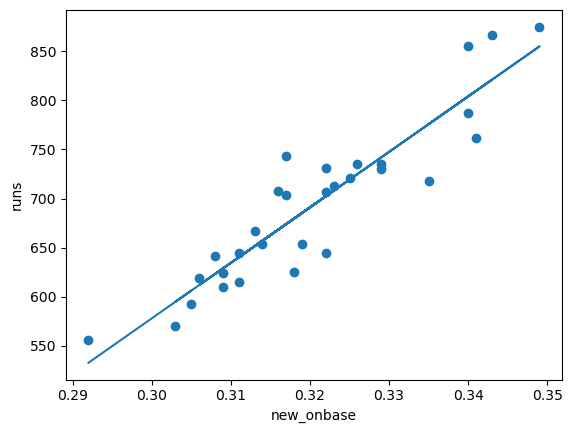

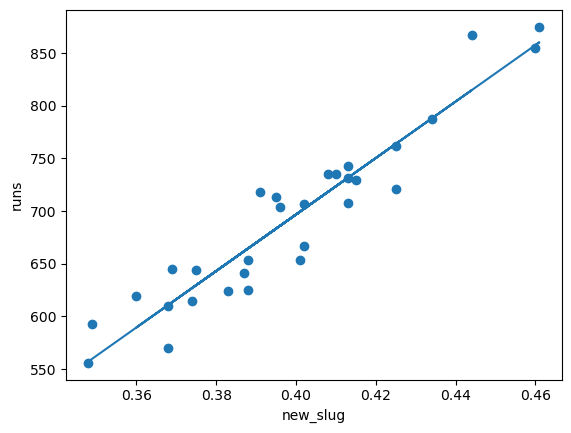

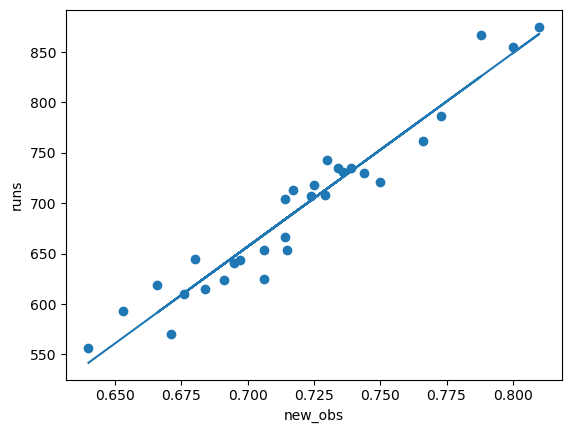

In [25]:
#scatter plot with regression line
for item in col_names[5:]:
    y= mlb_df['runs']
    x1 = mlb_df[item]
    plt.scatter(x1,y)
    m, b = np.polyfit(x1, y, 1)
    plt.plot(x1, m*x1+b)
    plt.xlabel(item)
    plt.ylabel('runs')
    plt.show()

In [21]:
y = mlb_df['runs']

for item in col_names[5:]:
    x1 = mlb_df[item]

    formula = 'y ~ x1'
    results = ols(formula, data=mlb_df).fit()

    #In any case, results.summary() will display the regression results and organize them into three tables.
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     157.6
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.12e-13
Time:                        04:11:40   Log-Likelihood:                -146.07
No. Observations:                  30   AIC:                             296.1
Df Residuals:                      28   BIC:                             298.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1118.4198    144.480     -7.741      0.0

<div class = 'exercise'>
<h4>Exercise 10</h4>
Check the model diagnostics for the regression model with the variable you decided was the best predictor for <code>runs</code>.
</div>

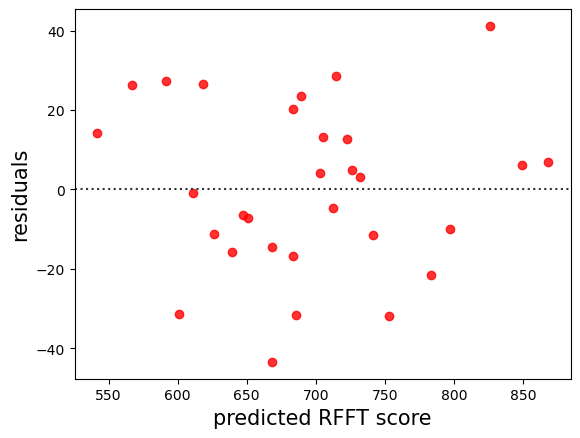

In [22]:
yhat =1919.3636*x1 -686.6143

residuals= (y -yhat)
sns.residplot(x= yhat, y= residuals, color = 'red')
plt.xlabel('predicted RFFT score', fontsize = 15)
plt.ylabel('residuals', fontsize = 15)
plt.show()

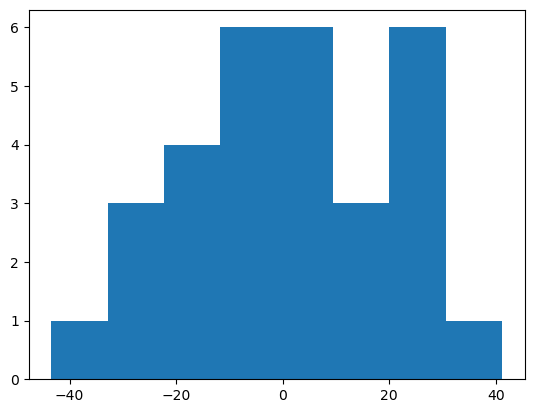

In [23]:
#histogram of residuals
plt.hist(residuals, bins = 8)
plt.show()


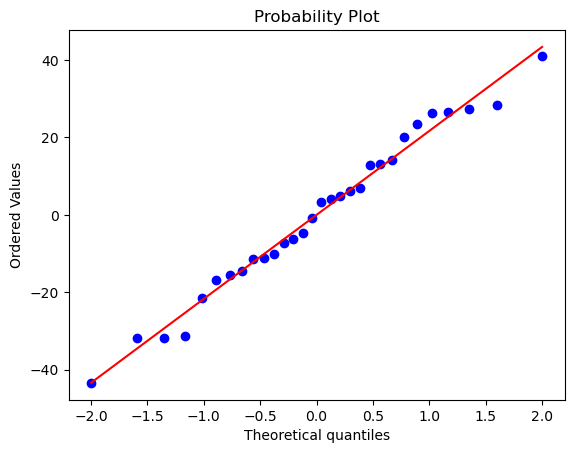

In [24]:
#Normal Q-Q Plot
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show()